# 1. import data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

## 1-3 Read data:

In [ ]:
# 1. Load data
dataset = pd.read_csv('customer_churn_data.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


0   customerID       
1   gender: 男性或女性            
2   SeniorCitizen: 客戶是否是老年人 (1, 0)     
3   Partner: 客戶是否有合作夥伴 (Yes, No)               
4   Dependents: 客戶是否有家屬 (Yes, No)      
5   tenure: 客戶停留的月數             
6   PhoneService: 客戶是否有電話服務 (Yes, No)      
7   MultipleLines: 客戶是否有多條線路 (Yes, No, No phone service)     
8   InternetService: 客戶的互聯網服務提供商 (DSL, Fiber optic, No)      
9   OnlineSecurity: 客戶是否有 online security (Yes, No, No internet service)    
10  OnlineBackup: 客戶是否有在線備份 (Yes, No, No internet service)       
11  DeviceProtection: 客戶是否有設備保護 (Yes, No, No internet service)       
12  TechSupport: 客戶是否有技術支持 (Yes, No, No internet service)       
13  StreamingTV: 客戶是否有 streaming TV (Yes, No, No internet service)       
14  StreamingMovies: 客戶是否有 streaming movies (Yes, No, No internet service)      
15  Contract: 客戶的合約期限 (Month-to-month, One year, Two year)         
16  PaperlessBilling: 客戶是否有無紙化計費 (Yes, No)      
17  PaymentMethod: 客戶的付款方式 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))   
18  MonthlyCharges: 每月向客戶收取的金額     
19  TotalCharges: 向客戶收取的總金額   
20  Churn: 客戶是否流失 (Yes or No)        

In [5]:
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype(object)
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
print(dataset.head())

   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female             0     Yes         No       1           No   
1  5575-GNVDE    Male             0      No         No      34          Yes   
2  3668-QPYBK    Male             0      No         No       2          Yes   
3  7795-CFOCW    Male             0      No         No      45           No   
4  9237-HQITU  Female             0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessB

In [8]:

print(dataset.info())
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Pipeline Accuracy: 0.7863733144073811
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.63      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409



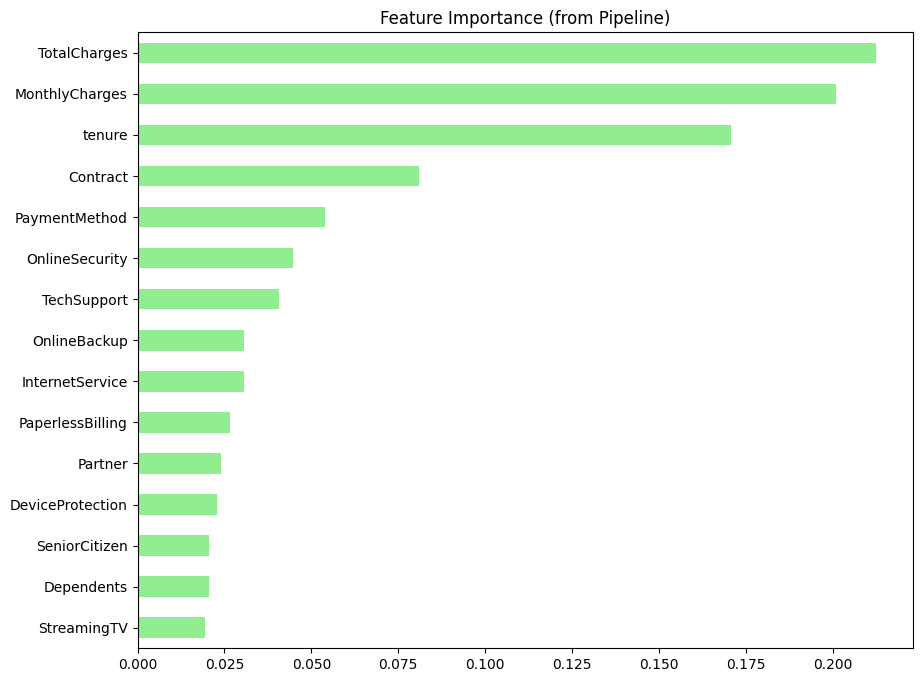

In [13]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
df = dataset.drop('customerID', axis=1)

# 分離特徵與標籤
X = df.drop('Churn', axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 定義欄位類型
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2. 建立預處理器 (ColumnTransformer)
# 數值欄位：自動填補缺失值
numeric_transformer = SimpleImputer(strategy='mean') # 可調參數：strategy ('mean', 'median', 'most_frequent')

# 類別欄位：編碼
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# 3. 建立 Pipeline (管線)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # --- 【可調參數區：特徵選擇】 ---
    ('feature_selection', SelectKBest(
        score_func=f_classif, 
        k=15  # <--- 可調整：保留多少個最重要的特徵 (1 到 19)
    )), 
    # --- 【可調參數區：隨機森林】 ---
    ('classifier', RandomForestClassifier(
        n_estimators=100,    # <--- 可調整：樹的數量 (通常 100-500)
        max_depth=None,      # <--- 可調整：樹的最大深度 (預防過擬合，可設 5-20)
        min_samples_split=2, # <--- 可調整：分裂節點所需的最小樣本數
        random_state=42      # 確保結果可重現
    ))
])

# 4. 資料分割
# 可調參數：test_size (測試集比例，通常 0.2 或 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 訓練模型
pipeline.fit(X_train, y_train)

# 6. 評估與視覺化
y_pred = pipeline.predict(X_test)
print(f"Pipeline Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# 提取重要性並繪圖
selector = pipeline.named_steps['feature_selection']
classifier = pipeline.named_steps['classifier']
all_feature_names = numeric_cols + categorical_cols
selected_features = [f for f, s in zip(all_feature_names, selector.get_support()) if s]

feat_importances = pd.Series(classifier.feature_importances_, index=selected_features).sort_values(ascending=True)
plt.figure(figsize=(10, 8))
feat_importances.plot(kind='barh', color='lightgreen')
plt.title('Feature Importance (from Pipeline)')
plt.show()